In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from pylab import imshow, show, get_cmap

class Unets(object):
    r"""Apply Unets denoising.

    Parameters
    ----------
    model: str
        Which denoising algorithm to use.

    """

    def __init__(self, items=None):
        r"""Initialize class attributes."""
        self.model = keras.models.load_model('saved_unets')
        
    def convert_and_pad(self, image):
        r"""Convert images to 64x64x1 shaped tensors to feed the model, using zero-padding."""
        image = tf.reshape(tf.convert_to_tensor(img), 
                           [np.shape(img)[0], np.shape(img)[1], np.shape(img)[2], 1])
        pad = tf.constant([[0,0], [6,7],[6,7], [0,0]])
        return tf.pad(image, pad, "CONSTANT")
       
      
    def crop_and_convert(self, image):
        r"""Crop back the image to its original size and convert it to np.array"""
        image = tf.reshape(tf.image.crop_to_bounding_box(image, 6, 6, 51, 51), [np.shape(img)[0], 51, 51])
        return image.numpy()

    def op(self, image, **kwargs):
        r"""Apply Unets denoising."""
        # Threshold all scales but the coarse
        image = self.convert_and_pad(image)
        image = self.model.predict(image)
        return self.crop_and_convert(image)

    def cost(self, x, y):
        r"""Return cost."""
        return 0

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
learnlets = Unets()

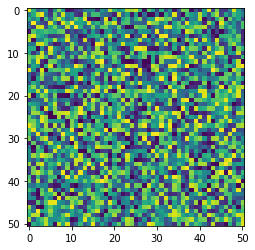

In [19]:
img = np.random.rand(10,51,51)
imshow(img[0])

(10, 64, 64, 1)


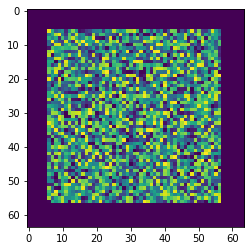

In [20]:
#### Convert the images to tensors, and padding them to get to 64x64 images. 
#### [0,0] on the batch size and number of channels
img = learnlets.convert_and_pad(img)
print(np.shape(img))
imshow(img[0])


(10, 51, 51)


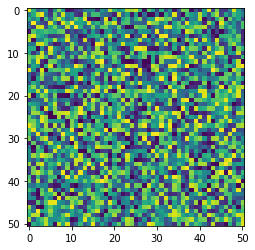

In [21]:
#### Crop back the images to 51x51

img = learnlets.crop_and_convert(img)
print(np.shape(img))
imshow(img[0])

(10, 51, 51)


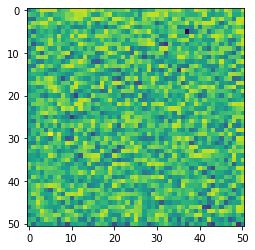

In [22]:
#### Test the model denoising with the op function

img = learnlets.op(img)
print(np.shape(img))
imshow(img[0])